In [57]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.unicode.east_asian_width', True)

import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE #차원축소

In [95]:
from matplotlib import font_manager, rc
import matplotlib
font_path = './malgun.ttf' #내가 쓰고 싶은 폰트 파일 경로로 쓰면 됨. 현재 같은 폴더 안에 있음.
font_name = font_manager.FontProperties(fname=font_path).get_name() #get_name:폰트의 이름을 알려줌.
matplotlib.rcParams['axes.unicode_minus']=False
rc('font', family=font_name)

In [99]:
#모델 load
embedding_model = Word2Vec.load('./model/Word2VecModel_cheeseball_BBQ.model')

In [100]:
#키워드 입력
key_word = 'bhc'
sim_word = embedding_model.wv.most_similar(key_word, topn=50)
print(sim_word)

[('bbq', 0.47579431533813477), ('friedchicken', 0.4074752926826477), ('cheese', 0.4019632041454315), ('feat', 0.3798562288284302), ('instafood', 0.3781507611274719), ('asmr', 0.368692547082901), ('뿌링클', 0.3658990263938904), ('foodstagram', 0.3432474434375763), ('koreanfood', 0.33973103761672974), ('chicken', 0.3246479630470276), ('사실', 0.3223966956138611), ('like', 0.32084041833877563), ('follow', 0.3176161050796509), ('맘스터치', 0.3155444264411926), ('푸라닭', 0.29778939485549927), ('콤보', 0.2893388271331787), ('fff', 0.28555771708488464), ('동생', 0.274760365486145), ('치킨', 0.2708966135978699), ('치즈볼', 0.27030402421951294), ('food', 0.26754558086395264), ('요즘', 0.26298022270202637), ('레드', 0.26125603914260864), ('bbqchickeninsta', 0.25815626978874207), ('체다', 0.25724196434020996), ('다리', 0.2485131472349167), ('거래', 0.24491006135940552), ('jmt', 0.24469983577728271), ('치즈', 0.24466609954833984), ('진리', 0.24137654900550842), ('세트', 0.23821744322776794), ('인적', 0.23519493639469147), ('구이', 0.234

In [88]:
tokens = []
labels = []
for i in sim_word:
    labels.append(i[0])
    tokens.append(embedding_model[i[0]])

c:\users\07\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [89]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)

In [90]:
df_tokens = pd.DataFrame(tokens)
df_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.269522,0.301334,-0.049679,-0.322581,0.209893,0.045357,0.430423,0.243976,-0.429757,0.228854,-0.034016,0.895519,-0.377139,0.649514,-0.132260,0.269149,-0.160847,0.152462,-0.423008,-0.142256,-0.070190,0.394265,-0.287852,0.308417,-0.389151,0.441837,0.630355,0.784474,-0.520407,-0.263872,0.493005,-0.027220,0.052756,0.391780,0.302256,0.111425,0.046190,0.549333,-0.091815,-0.015063,0.031963,-0.230963,0.205608,0.152478,-0.158452,0.454696,-0.162668,-0.083830,0.478145,0.036423,-0.129614,0.530051,-0.057040,0.165602,0.154653,-0.126242,0.312677,0.186955,0.205188,0.470373,0.347595,-0.458468,-0.039557,-0.069965,0.193097,0.112243,-0.277455,0.418081,0.101969,-0.149571,1.212305,0.269027,0.217987,0.301149,0.140661,0.263876,0.285071,0.179252,-0.163644,-0.221956,-0.457528,0.101818,0.172437,0.039974,-0.108529,-0.065505,0.096811,-0.571838,0.251748,0.318893,-0.025519,0.276106,-0.462334,0.136779,-0.893162,-0.236542,0.466462,0.483004,0.638031,0.408551
1,-0.152123,0.412713,-0.121863,-0.218616,0.391156,-0.191117,-0.076346,0.308319,-0.179109,-0.052320,-0.117629,0.061071,-0.238357,0.281154,-0.113853,0.197837,-0.426715,0.135433,-0.024525,0.239251,-0.275797,0.131261,-0.073117,0.163187,0.090095,-0.037695,0.152969,0.407824,-0.116631,0.033909,-0.338581,-0.318984,-0.177382,-0.157719,0.043706,-0.063141,0.083361,-0.060800,-0.002768,0.014509,-0.122237,-0.207478,-0.224097,0.019269,0.190757,-0.082866,-0.196212,-0.263208,-0.135158,0.362384,0.026049,0.145641,0.398719,-0.149317,0.337386,0.155207,0.049713,0.068737,0.492762,0.138719,0.175809,-0.057368,0.155438,-0.134180,0.216974,-0.088519,-0.116176,0.184006,0.162991,-0.148448,0.266603,-0.062841,-0.054133,-0.197682,-0.033758,-0.011465,0.230216,0.141868,-0.385749,0.157071,-0.464761,-0.199848,0.097923,0.176833,-0.146394,-0.158316,0.085279,0.151084,-0.044174,0.016136,-0.040845,0.085561,-0.191360,0.408571,-0.093760,0.124644,-0.052140,0.336550,0.027897,0.208057
2,0.069528,0.053105,-0.105606,0.013977,0.163507,-0.247455,0.049589,-0.057150,-0.093164,-0.250917,-0.137758,0.091597,0.035693,0.151242,-0.074761,-0.082370,-0.169935,0.104431,-0.020967,0.198891,-0.010154,-0.048979,0.127659,0.237885,0.041649,-0.039006,0.050473,0.462487,-0.107060,-0.014728,-0.025074,0.038921,-0.099006,0.135514,0.047380,0.140014,-0.025503,-0.020838,-0.189297,-0.200839,0.044752,0.014947,0.099401,-0.060965,0.010980,-0.001857,-0.276145,-0.060897,0.047651,0.022864,-0.010416,0.094088,-0.040115,-0.059060,0.219937,0.004011,-0.067972,0.023639,0.119176,-0.053844,-0.210170,-0.195415,-0.000027,0.033890,0.075354,-0.116157,0.163568,0.081561,0.028306,0.050000,0.066293,-0.037604,-0.117511,0.215826,-0.020370,-0.022369,0.102973,-0.035749,-0.189127,-0.029852,-0.329645,-0.029272,-0.133455,-0.061119,-0.021191,0.117597,0.144005,-0.103430,0.229008,-0.105086,0.084167,0.139396,0.220019,-0.051435,-0.213244,0.055875,0.069801,-0.045899,0.103968,0.044293
3,-0.041180,-0.005512,-0.458845,-0.088348,0.285073,0.111773,0.279898,-0.014832,0.060581,-0.046847,-0.229501,0.023131,-0.218746,-0.118409,0.294558,-0.142470,-0.182840,-0.230370,-0.123592,0.647285,-0.351547,0.066572,0.175381,-0.200451,0.002923,-0.308952,0.269162,-0.058781,-0.500572,0.348814,0.286898,-0.035516,0.005922,-0.192111,0.337748,0.310096,-0.189486,-0.064957,-0.051220,-0.607160,0.228186,0.323447,-0.183647,-0.101639,-0.359002,0.390481,-0.318061,-0.221637,0.082134,-0.016508,-0.141336,0.321560,0.039612,-0.055697,0.270849,0.365789,0.090825,0.477699,0.466526,-0.430729,-0.452761,-0.390413,-0.204287,-0.034360,0.376688,-0.567344,-0.607060,-0.494332,0.229495,0.408592,0.416476,0.137716,0.451140,-0.198430,0.160263,-0.012343,0.060064,-0.153917,-0.249826,-0.290404,-0.480618,-0.177371,-0.052299,0.167863,0.255164,0.335925,0.352977,0.095709,0.384951,-0.305100,

In [91]:
#100차원 벡터값을 2차원으로 차원축소하여 시각화
new_values = tsne_model.fit_transform(df_tokens)
print(new_values[0])
print(type(new_values))

[-73.62097   19.900702]
<class 'numpy.ndarray'>


In [92]:
df_xy = pd.DataFrame({'words':labels, 'x':new_values[:,0], 'y':new_values[:,1]})
print(df_xy.head(20))

             words          x          y
0         롯데리아 -73.620972  19.900702
1           사이드  57.306931  68.765121
2           치즈볼  12.669300 -15.969723
3             쫀득  43.945930  35.856316
4             제일 -74.052216 -14.178606
5             요즘  94.786842   7.723245
6         맘스터치 -69.075546  54.846607
7              bbq  20.143394  59.074684
8           뿌링클  60.684898 -54.516678
9             한번  -1.676404 -77.432587
10  바삭크림치즈볼 -14.985907 -12.491014
11            치킨  23.629868 -45.712818
12            식감 -68.322594 -50.148041
13            콤보  -8.198010 -43.124985
14            달달 -38.417953  72.108421
15            크림 -39.759171 -30.337692
16            조합  45.092594 -21.715067
17            바삭 -42.418934   2.882922
18            엄마  29.015472  92.364784
19          맛있는  79.251816  40.964027


In [93]:
df_xy.loc[df_xy.shape[0]] = (key_word, 0, 0)
print(df_xy.tail()) 

     words          x          y
26    찜햇  -6.895135  85.454674
27  같아요  60.033432   7.340374
28    맥주  12.531626  29.193933
29  칼로리  80.359032 -25.673376
30     bhc   0.000000   0.000000


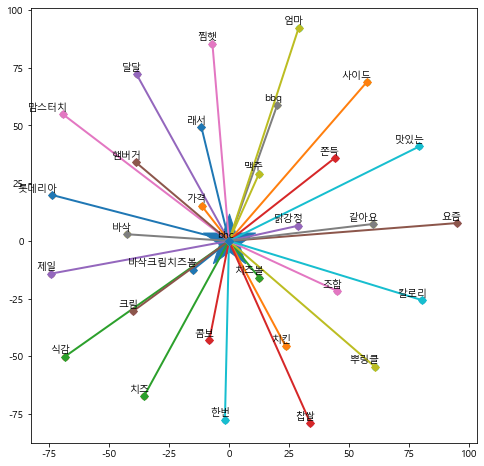

In [94]:
plt.figure(figsize=(8,8))
plt.scatter(0,0,s=3000, marker='*')
for i in range(len(df_xy.x)):
    a = df_xy.loc[[i, 30], :]
    plt.plot(a.x, a.y, '-D', linewidth=2)
    plt.scatter(df_xy.x[i], df_xy.y[i])
    plt.annotate(df_xy.words[i], xy=(df_xy.x[i], df_xy.y[i]), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
plt.scatter
plt.show()